In [16]:
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeRegressor
from sklearn import tree

In [17]:
heading_properties = [('font-size', '26px')]

cell_properties = [('font-size', '20px')]

dfstyle = [dict(selector="th", props=heading_properties),\
 dict(selector="td", props=cell_properties)]

In [18]:
food = [
    {
        'id': 1,
        'name': "Speisezwiebeln",
        'price': 0.10,
        'shape': 'rund',
        'kcal': 40,
        'bio': False,
        'train': True,
        'zwiebel': True
    },
    {
        'id': 2,
        'name': "Lauchzwiebeln",
        'price': 0.13,
        'shape': 'stange',
        'kcal': 32,
        'bio': False,
        'train': True,
        'zwiebel': True
    },
    {
        'id': 2,
        'name': "Bio-Lauchzwiebeln",
        'price': 0.15,
        'shape': 'stange',
        'kcal': 32,
        'bio': True,
        'train': False,
        'zwiebel': True
    },
    {
        'id': 11,
        'name': "Rote Zwiebeln",
        'price': 0.14,
        'shape': 'rund',
        'kcal': 32,
        'bio': False,
        'train': True,
        'zwiebel': True
    },
    {
        'id': 0,
        'name': "Bio Rote Zwiebeln",
        'price': 0.15,
        'shape': 'rund',
        'kcal': 36,
        'bio': False,
        'train': True,
        'zwiebel': True
    },
    {
        'id': 3,
        'name': "Chiquita Banane",
        'price': 0.2,
        'shape': 'stange',
        'kcal': 89,
        'bio': False,
        'train': False,
        'zwiebel': False
    },
    {
        'id': 4,
        'name': "Bio Banane",
        'price': 0.2,
        'shape': 'stange',
        'kcal': 89,
        'bio': True,
        'train': True,
        'zwiebel': False
    },
    {
        'id': 5,
        'name': "Bio Kartoffeln",
        'price': 0.17,
        'shape': 'rund',
        'kcal': 73,
        'bio': True,
        'train': True,
        'zwiebel': False
    },
    {
        'id': 6,
        'name': "Kohlrabi",
        'price': 0.15,
        'shape': 'rund',
        'kcal': 27,
        'bio': False,
        'train': True,
        'zwiebel': False
    },
    {
        'id': 7,
        'name': "Süßkartoffel",
        'price': 0.19,
        'shape': 'rund',
        'kcal': 86,
        'bio': False,
        'train': False,
        'zwiebel': False
    },
    {
        'id': 8,
        'name': "Karotten",
        'price': 0.11,
        'shape': 'stange',
        'kcal': 41,
        'bio': False,
        'train': False,
        'zwiebel': False
    },
    {
        'id': 9,
        'name': "Zucchini Grün",
        'price': 0.35,
        'shape': 'stange',
        'kcal': 17,
        'bio': False,
        'train': True,
        'zwiebel': False
    },
    {
        'id': 10,
        'name': "Tomate Rispe",
        'price': 0.23,
        'shape': 'rund',
        'kcal': 21,
        'bio': False,
        'train': True,
        'zwiebel': False
    },
    {
        'id': 12,
        'name': "Bio Rispentomaten",
        'price': 0.46,
        'shape': 'rund',
        'kcal': 21,
        'bio': True,
        'train': False,
        'zwiebel': False
    }
]

df = pd.DataFrame.from_dict(food)

In [19]:
feature_cols = ['price', 'kcal', 'bio' ]

df_train = df[df['train'] == True]
df_test = df[df['train'] == False]

In [20]:
X = df_train.loc[:, feature_cols]
y = df_train.loc[:, ['zwiebel']]

In [21]:
#### Fit regression model
clf = DecisionTreeRegressor(max_depth=4)
clf.fit(X, y)

DecisionTreeRegressor(max_depth=4)

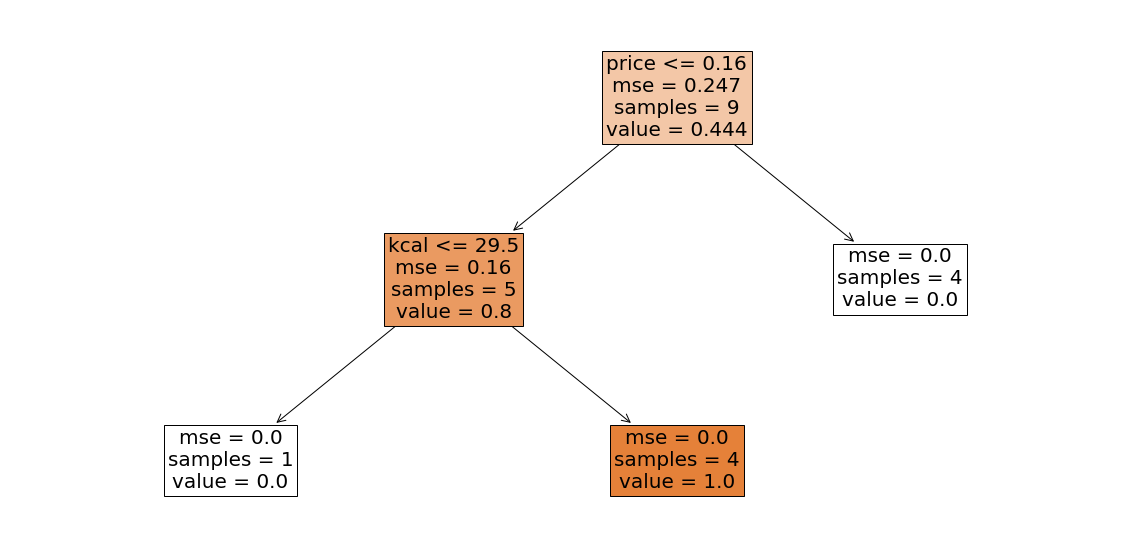

In [22]:
# plot tree
plt.figure(figsize=(20, 10))  # set plot size (denoted in inches)
tree.plot_tree(clf,
               fontsize=20,
               feature_names = feature_cols,
               filled = True);

plt.show()

<AxesSubplot:>

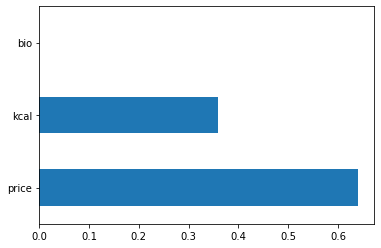

In [23]:
importances = clf.feature_importances_
f_import = list(zip(importances, feature_cols))

(pd.Series(clf.feature_importances_, index=X.columns)
   .nlargest(10)
   .plot(kind='barh'))

In [24]:
X_test = df_test.loc[:, feature_cols]

y_predict = clf.predict(X_test)
df_2 = pd.DataFrame(data=y_predict)

In [25]:
df_test.reset_index().join(df_2)
df_test.style.set_table_styles(dfstyle)

,id,name,price,shape,kcal,bio,train,zwiebel
2,2,Bio-Lauchzwiebeln,0.150000,stange,32,True,False,True
5,3,Chiquita Banane,0.200000,stange,89,False,False,False
9,7,Süßkartoffel,0.190000,rund,86,False,False,False
10,8,Karotten,0.110000,stange,41,False,False,False
13,12,Bio Rispentomaten,0.460000,rund,21,True,False,False
